In [1]:
import sys
sys.path.append(r'C:\Users\admin\Desktop\code')

In [2]:
import binary_io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
import flash_class
import flash_visual
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import warnings
warnings.filterwarnings("ignore")
import computation_class 
compu = computation_class.computation_class()

In [3]:
def getarray(filenumber=[0],field='dens',prefix='Cone_2D_120_plane',box_grid=[800,600],keyword='cnt',species=None):
    import binary_io
    import numpy as np
    import warnings
    warnings.filterwarnings("ignore")
    
    io = binary_io.binary_io()
    array = io.flash_field_write(prefix=prefix,keyword=keyword,filenumber=filenumber,field=field,
                            geom=[-0.1,0.7,-0.3,0.3,0,1],ngrid=[16,16,1],box_grid=box_grid,species=species)
    array = array
    
    return array

In [ ]:
#写出函数中需要用到的参数
prefix='Cone_2D_120_plane'
box_grid=[8000,6000]
keyword='cnt'
grid_x_min, grid_x_max = 2000, 7000
grid_y_min, grid_y_max = 1500, 4500

# grid_x_min, grid_x_max = 0, 60
# grid_y_min, grid_y_max = 0, 60


geom=[-0.1,0.7,-0.3,0.3,0,1]
ngrid=[16,16,1]

#模拟中的一些参数
targs = ['targ','tar2','cham'] #targ 为Cu，tar2为CH，cham为He
Abar = [64, 6.5, 4]
me = 9.11e-31
mp = 1836*me
f_m = 0.01
f_n = 0.01
f_T = 1

mass_ratio = list(f_m * np.array(Abar) * 1836)
mass_ratio = list(map(round,mass_ratio))

Zbar = [15,3,2] #电离度

io = binary_io.binary_io()

zabr = io.flash2epoch(prefix=prefix, filenumber=[29],keyword=keyword, geom=geom, dimension=2, ngrid=ngrid, 
                      box_grid=box_grid, Abars=Abar, mi=mass_ratio, targs=targs,temp_factor=f_T, selec_box=True,
                      grid_x_min=grid_x_min, grid_x_max=grid_x_max, grid_y_min=grid_y_min,grid_y_max=grid_y_max)




矩阵大小为： (500, 300)
矩阵大小为： (500, 300)
矩阵大小为： (500, 300)
Zbar is  18
矩阵大小为： (500, 300)
矩阵大小为： (500, 300)
矩阵大小为： (500, 300)
矩阵大小为： (500, 300)
矩阵大小为： (500, 300)
矩阵大小为： (500, 300)
矩阵大小为： (500, 300)


In [7]:
mass_ratio

[1175, 119, 73]

In [ ]:
#函数中需要输入的参数
prefix='Cone_2D_120_plane'
box_grid=[8000,6000]
geom=[-0.1,0.7,-0.3,0.3,0,1]

io = binary_io.binary_io()
zbar = io.flash2epoch()

## 对流体和PIC进行转换的定律

依据Ryutov的文章，存在以下转换定律：

$r_0 = a r_1, \rho_0 = b \rho_1, P_0 = c P_1$，r,$\rho$与P分别为距离，密度以及压强。但如果要与PIC情况进行转化，但PIC无法进行太大质量的粒子的计算，所以我们在这里需要将质量进行新的转换。

$m_0 = f_m m_1, n_0 = f_n n_1, T_0 = f_T T_1$，m,n,T粉笔诶是质量，数密度和温度



In [34]:
#取得模拟盒子范围
grid_x_min, grid_x_max = 2000, 7000
grid_y_min, grid_y_max = 1500, 4500

targs = ['targ','tar2','cham'] #targ 为Cu，tar2为CH，cham为He
Abar = [64, 6.5, 4]
me = 9.11e-31
mp = 1836*me
f_m = 0.01
f_n = 0.01
f_T = 9



In [43]:
#获取所需数据
#总的相关数据
number = 29
dens = getarray(field='dens',filenumber=[number])
tele = getarray(field='tele',filenumber=[number])
tion = getarray(field='tion',filenumber=[number])
#velocity
vx = getarray(field='velx',filenumber=[number])
vy = getarray(field='vely',filenumber=[number])

#magnetic field
magx = getarray(field='magx',filenumber=[number])
magy = getarray(field='magy',filenumber=[number])
magz = getarray(field='magz',filenumber=[number])

#Cu
targ = getarray(field='targ',filenumber=[number])
# CH
tar2 = getarray(field='tar2',filenumber=[number])
#He
cham = getarray(field='cham',filenumber=[number])

#电离度相关
ye = getarray(field='ye',filenumber=[number])
sumy = getarray(field='sumy',filenumber=[number])

In [ ]:
#将数据存储
np.save('dens.npy',dens)
np.save('tele.npy',tele)
np.save('tion.npy',tion)
np.save('velx,npy',vx)
np.save('vely.npy',vy)
np.save('magx.npy',magx)
np.save('magy.npy',magy)
np.save('magz.npy',magz)
np.save('targ.npy',targ)
np.save('tar2.npy',tar2)
np.save('cham.npy',cham)

np.save('ye.npy',ye)
np.save('sumy.npy',sumy)

In [70]:
#给出不同粒子的平均电离度
Z_all = ye / sumy
Z_Cu = round(Z_all[np.where(targ > 0.95)].mean())
Z_CH = round(Z_all[np.where(tar2 > 0.95)].mean())
Z_He = round(Z_all[np.where(cham > 0.95)].mean())
Zbar = [Z_Cu,Z_CH,Z_He]

In [61]:
#首先求解出Hydro下的国际单位的东西
ion_all = []
ele_all = []
velx_all = []
vely_all = []
tar_rep = [targ, tar2, cham]

for i in range(len(Zbar)):
    ion_species = dens * ye * tar_rep[i] * 1e3 / (Abar[i] * mp)
    ele_species = ion_species * Zbar[i]
    
    ion_all.append(ion_species)
    ele_all.append(ele_species)
    
velx_hydro = vx * 1e-2
vely_hydro = vy * 1e-2



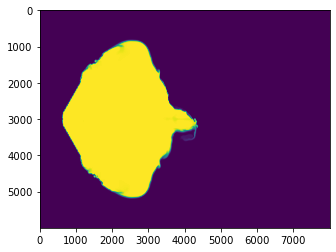

In [74]:

plt.imshow(new[0])

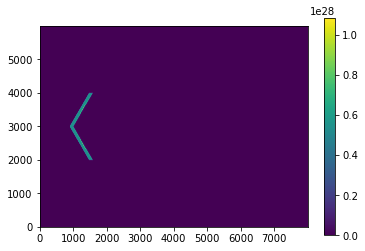

In [50]:
plt.imshow(ion_cal,origin='lower')
plt.colorbar()

In [47]:
ion_true = dens * ye * targ / (Abar[0]*mp)
ion_cal = dens * targ / mp
z = np.sum(ion_true)/np.sum(ion_cal)

In [48]:
z

2.25144989333983e-05

In [25]:
dens = getarray(field='dens',filenumber=[29])

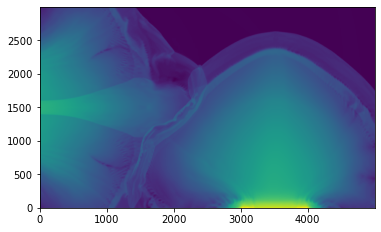

In [33]:
plt.imshow(np.log10(dens[1500:4500,2000:7000]),origin='lower')

In [13]:
#定义一些可能用到的参量
Abar = 6.5
Zbar = 3.5


In [14]:
0.3*1e8*1e-2*1836*me

5.017788e-22

In [15]:
1e8 * 1e-2 * (mass_ratio) * np.sqrt(temp_factor/(mass_ratio)) * 1836 * me

5.017788e-22